In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Importing the dataset and exploring the dataframe
diabetes_dataset = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")
print(diabetes_dataset.columns, '\n')
diabetes_dataset.shape

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object') 



(101766, 50)

In [32]:
# identify discrepancy in the dataset
print(diabetes_dataset.weight)
# it seems that the weight column is a discrepancy since it contains a lot of the value '?'
# Calculate the number of '?' in the 'weight' column
num_question_marks = diabetes_dataset['weight'].value_counts().get('?', 0)

# Calculate the total number of rows in the dataset
total_rows = len(diabetes_dataset)

# Calculate the proportion of '?' in the 'weight' column
proportion = num_question_marks / total_rows

print(f"The proportion of '?' in the 'weight' column is {proportion}, \n")
print("based on the results about 96.86 of rows in the 'weight' column is represented as '?'.\nWith such a large amount of missing data i think it would be more beneficial to drop this column all toghether.")

# dropping the 'weight' column
diabetes_dataset = diabetes_dataset.drop('weight', axis=1)


0         ?
1         ?
2         ?
3         ?
4         ?
         ..
101761    ?
101762    ?
101763    ?
101764    ?
101765    ?
Name: weight, Length: 101766, dtype: object
The proportion of '?' in the 'weight' column is 0.9685847925633315, 

based on the results about 96.86 of rows in the 'weight' column is represented as '?'.
With such a large amount of missing data i think it would be more beneficial to drop this column all toghether.


In [33]:
# my starting goal is to understand the distribution of diabetes medications across different payer codes.

# Group the data by 'Payer code' and 'diabetesMed'
grouped_data = diabetes_dataset.groupby(['payer_code', 'diabetesMed'])

# Get the size of each group
group_sizes = grouped_data.size()

# Convert the group sizes to a DataFrame and reset the index
group_sizes_df = group_sizes.to_frame(name='count').reset_index()

print(group_sizes_df)

# in order to understand this data it's important to know that each payer code stands for a different type of payer, such as different insurance companies or programs.

   payer_code diabetesMed  count
0           ?          No  10842
1           ?         Yes  29414
2          BC          No   1040
3          BC         Yes   3615
4          CH          No     32
5          CH         Yes    114
6          CM          No    334
7          CM         Yes   1603
8          CP          No    576
9          CP         Yes   1957
10         DM          No     91
11         DM         Yes    458
12         FR         Yes      1
13         HM          No   1759
14         HM         Yes   4515
15         MC          No   6564
16         MC         Yes  25875
17         MD          No    546
18         MD         Yes   2986
19         MP          No     12
20         MP         Yes     67
21         OG          No    149
22         OG         Yes    884
23         OT          No     18
24         OT         Yes     77
25         PO          No    112
26         PO         Yes    480
27         SI          No     13
28         SI         Yes     42
29        

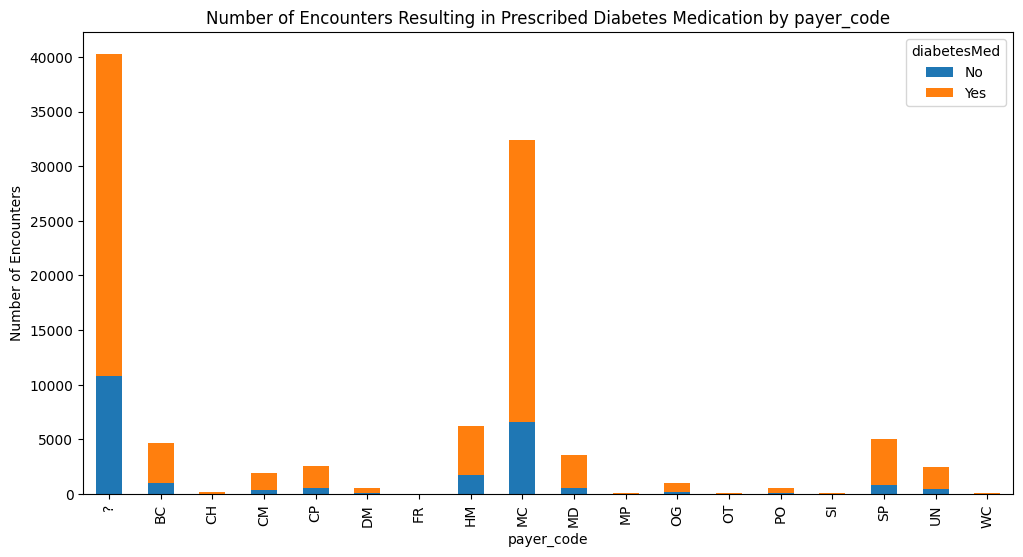

Total number of encounters resulting in prescribed diabetes medication: 78363
Total number of encounters not resulting in prescribed diabetes medication: 23403


In [37]:
# now with this grouping in mind i will create a bar plot to vizualize the number of encounters that resulted in presctibed diabetes medication

# Group the data by 'payer_code' and 'diabetesMed'
grouped_encounters_results = diabetes_dataset.groupby(['payer_code', 'diabetesMed']).size().unstack(fill_value=0)

# Plot the data
grouped_encounters_results.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Encounters Resulting in Prescribed Diabetes Medication by payer_code')
plt.xlabel('payer_code')
plt.ylabel('Number of Encounters')
plt.show()

# Summarize the data
total_prescribed = diabetes_dataset['diabetesMed'].value_counts()['Yes']
total_not_prescribed = diabetes_dataset['diabetesMed'].value_counts()['No']

print(f"Total number of encounters resulting in prescribed diabetes medication: {total_prescribed}")
print(f"Total number of encounters not resulting in prescribed diabetes medication: {total_not_prescribed}")

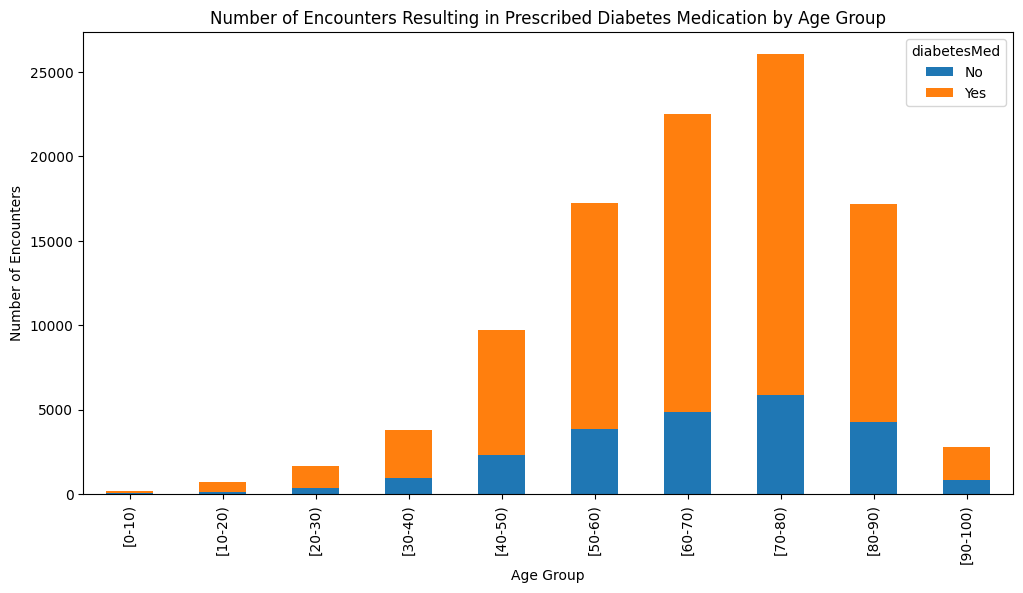

In [39]:
# are certain age groups more likely to be prescribed diabetes medication?

# Group the data by 'age' and 'diabetesMed'
age_grouped_data = diabetes_dataset.groupby(['age', 'diabetesMed']).size().unstack(fill_value=0)

# Plot the data
age_grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Encounters Resulting in Prescribed Diabetes Medication by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Encounters')
plt.show()

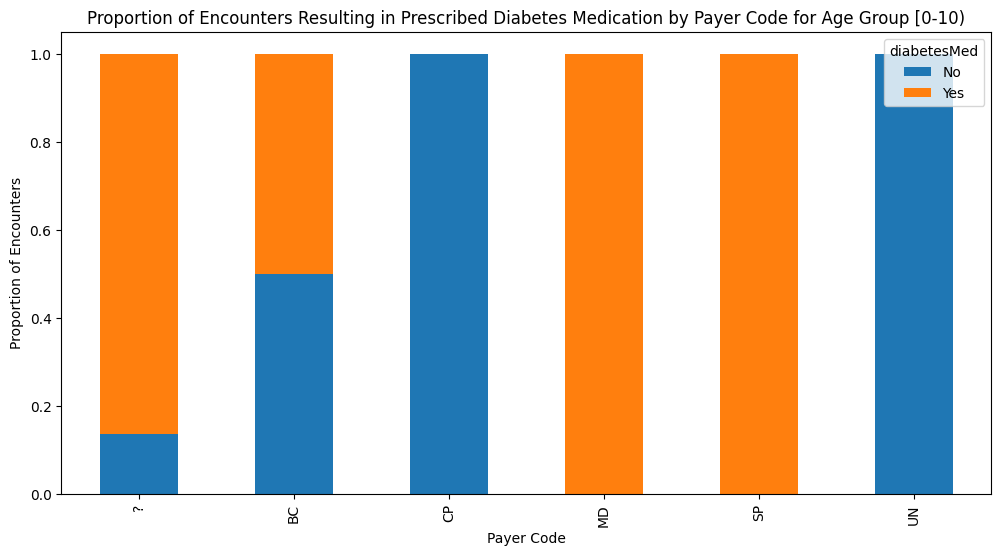

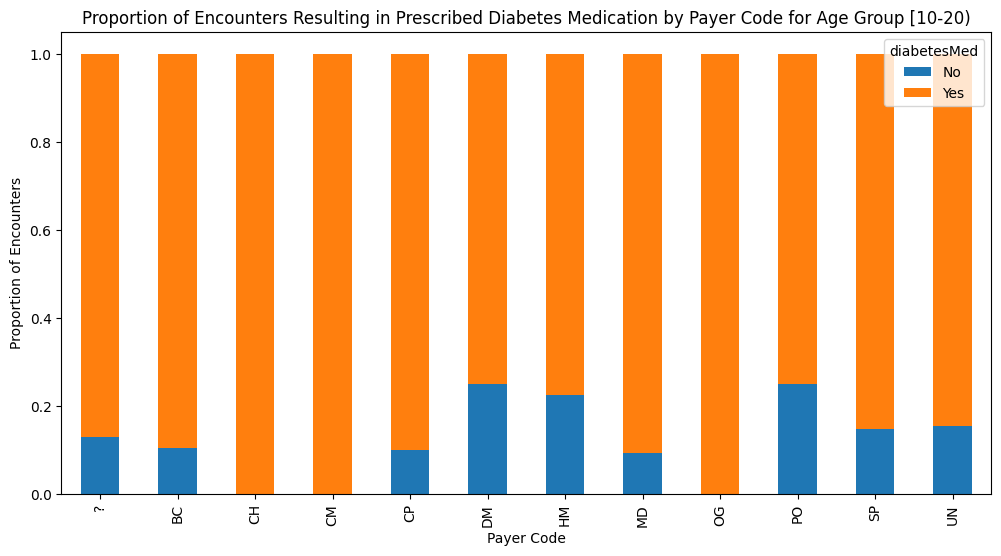

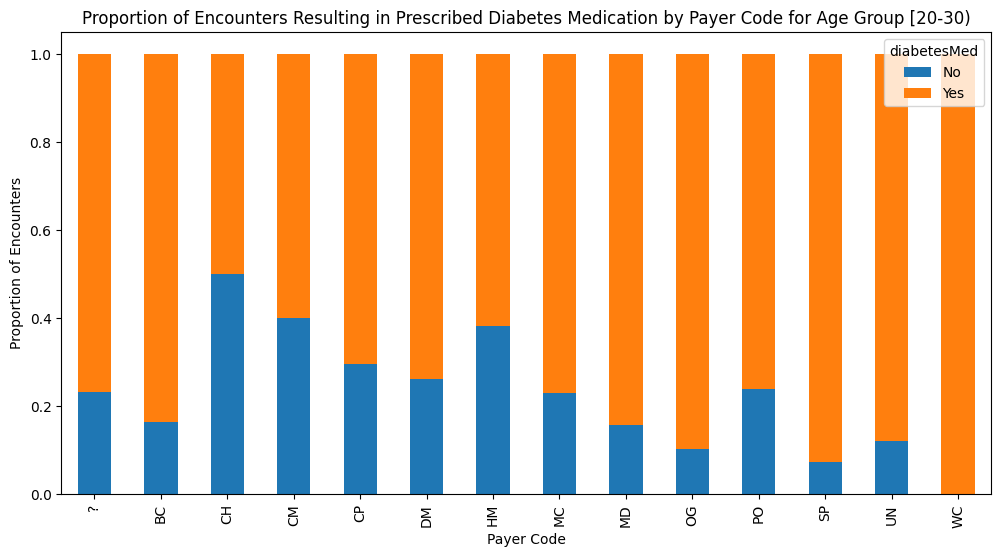

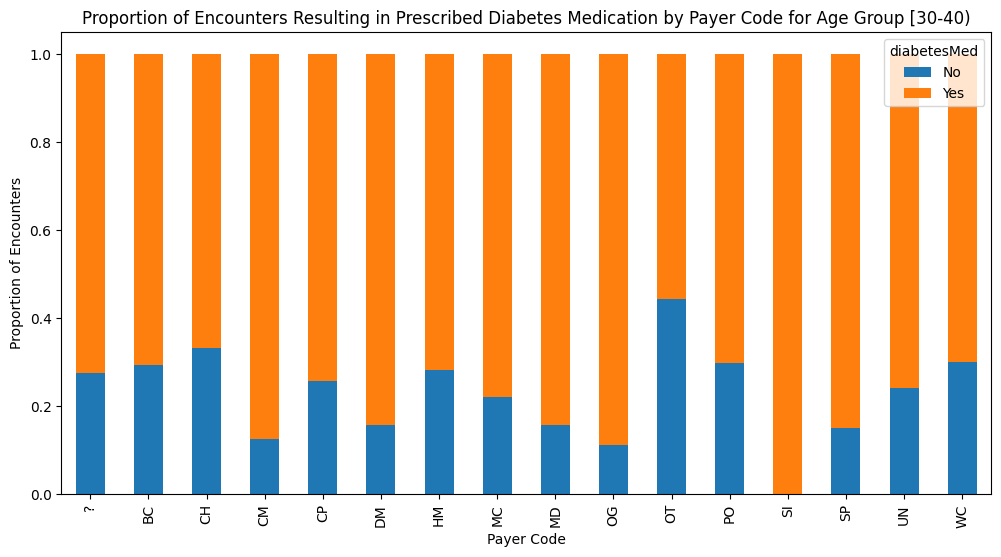

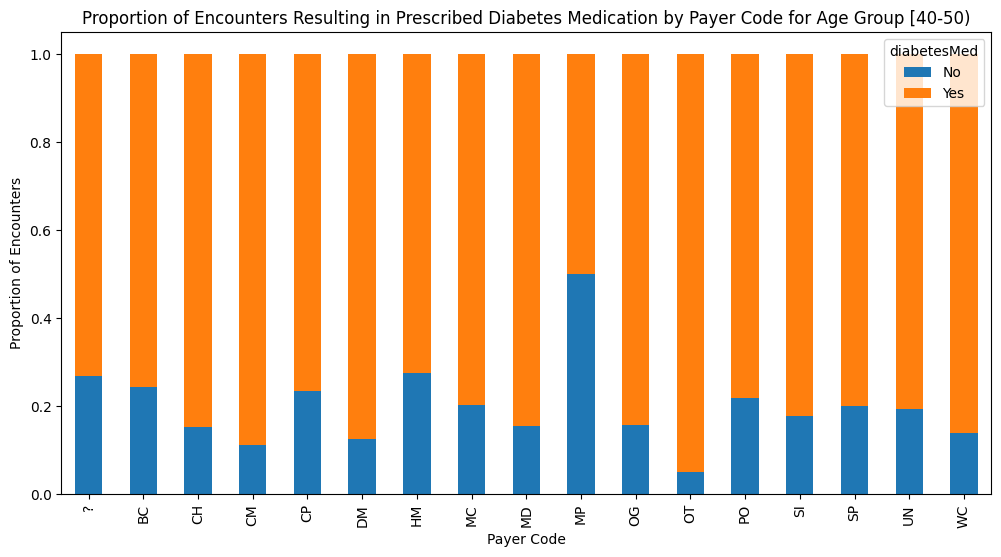

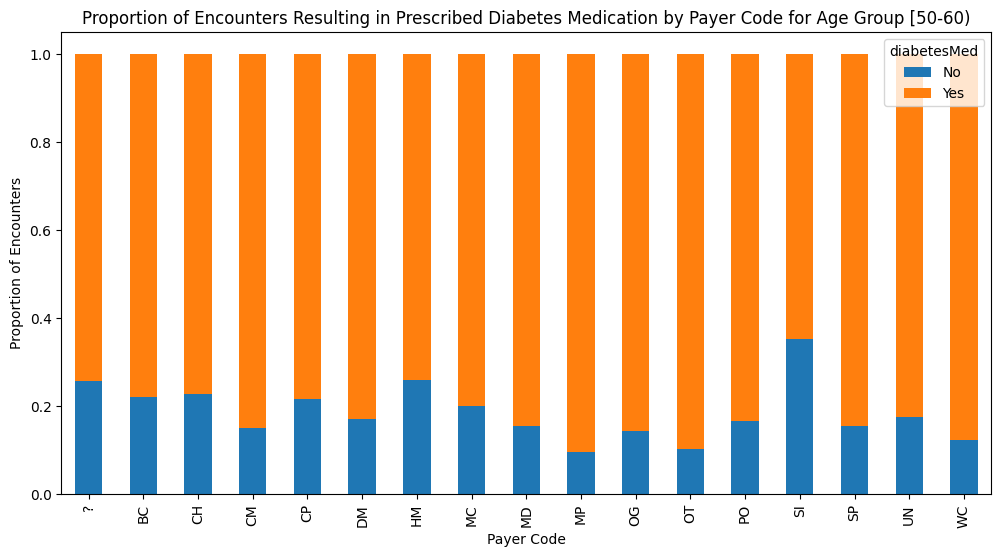

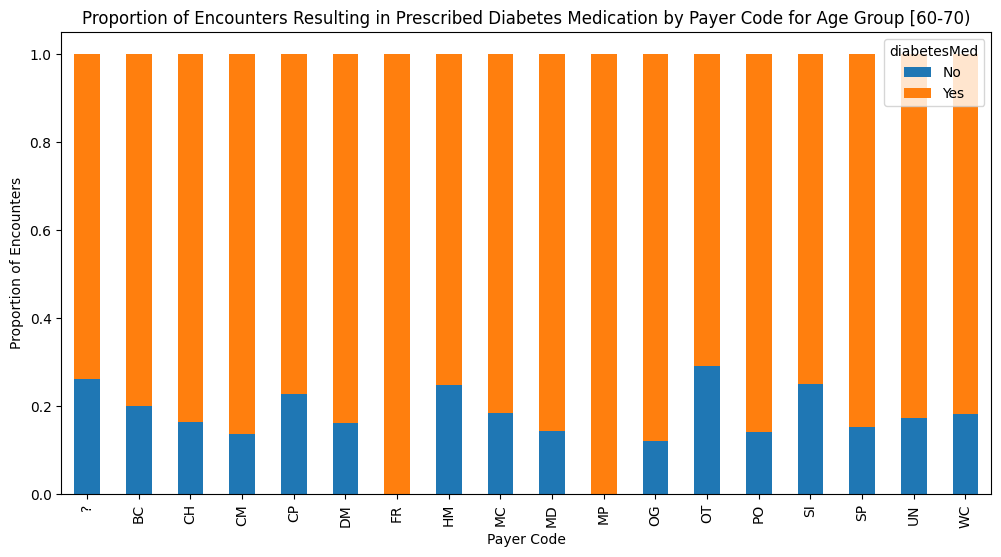

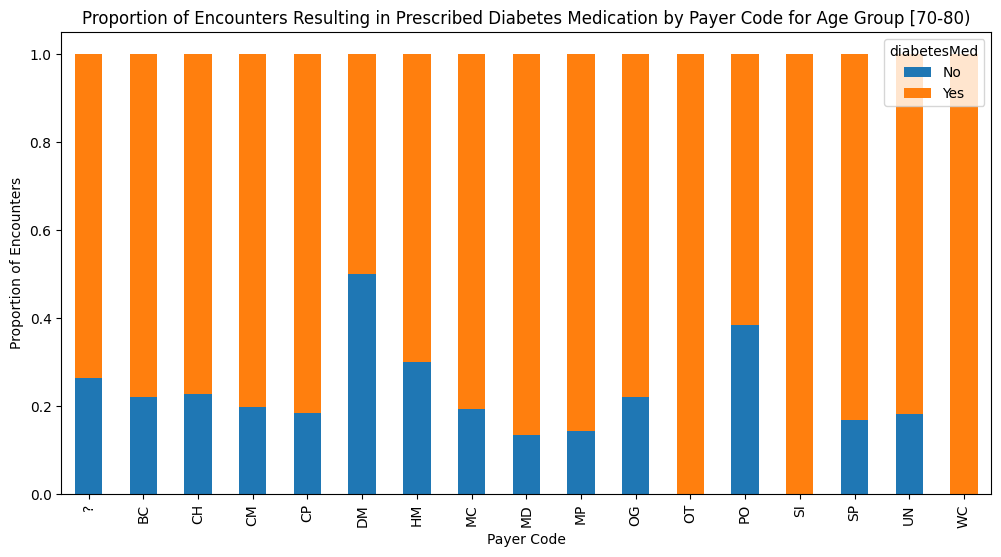

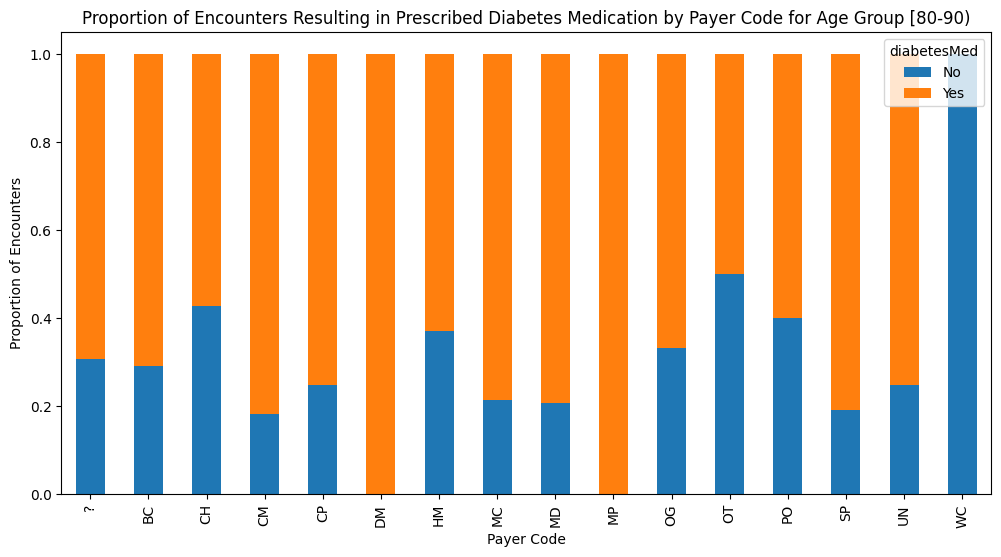

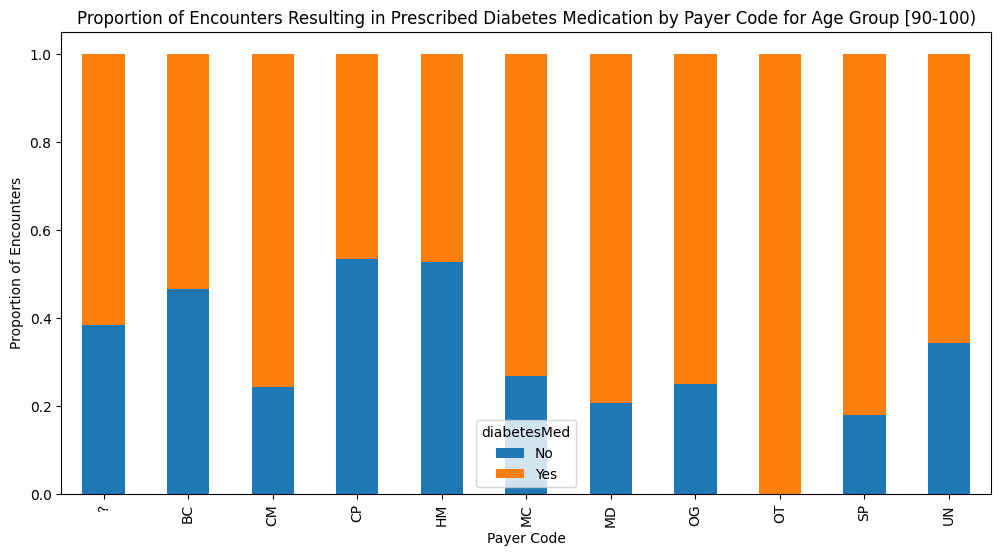

In [41]:
# Does this vary by payer code?

# Group the data by 'age', 'payer_code', and 'diabetesMed'
age_payer_grouped_data = diabetes_dataset.groupby(['age', 'payer_code', 'diabetesMed']).size().unstack(fill_value=0)

# Normalize the data within each age group to get the proportion of encounters with and without prescribed diabetes medication
age_payer_grouped_data = age_payer_grouped_data.div(age_payer_grouped_data.sum(axis=1), axis=0)

# Get the unique age groups
age_groups = diabetes_dataset['age'].unique()

# Create a separate plot for each age group
for age_group in age_groups:
    age_group_data = age_payer_grouped_data.loc[age_group]
    age_group_data.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Proportion of Encounters Resulting in Prescribed Diabetes Medication by Payer Code for Age Group {age_group}')
    plt.xlabel('Payer Code')
    plt.ylabel('Proportion of Encounters')
    plt.show()

From the analysis of the dataset, it’s evident that the prescription of diabetes medication varies significantly across different age groups and payer codes. The proportion of encounters resulting in prescribed diabetes medication provides a clear and comprehensive view of these variations. This analysis can be instrumental in understanding the demographics of patients who are more likely to be prescribed diabetes medication. Furthermore, it sheds light on the insurance programs or payers that are most commonly associated with these prescriptions